In [336]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import numpy as np

In [337]:
filePath = r'Movies2023.csv'

In [338]:
df = pd.read_csv(filePath)
df.head()

,Unnamed: 0,@type,url,name,description,image,contentRating,genre,duration,Language,...,aggregateRating.@type,aggregateRating.bestRating,aggregateRating.worstRating,aggregateRating.ratingValue,aggregateRating.ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection
0,0,Movie,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,...,AggregateRating,10,1,6.9,99934,NaN,NaN,NaN,NaN,NaN
1,1,Movie,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,...,AggregateRating,10,1,5.8,158261,NaN,NaN,NaN,NaN,NaN
2,2,Movie,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,...,AggregateRating,10,1,6.1,98028,NaN,NaN,NaN,NaN,NaN
3,3,Movie,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,...,AggregateRating,10,1,5.1,22652,NaN,NaN,NaN,NaN,NaN
4,4,Movie,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,...,AggregateRating,10,1,6.6,69295,Salaar,NaN,NaN,NaN,NaN


In [339]:
df.columns

Index(['Unnamed: 0', '@type', 'url', 'name', 'description', 'image',
       'contentRating', 'genre', 'duration', 'Language', 'Budget',
       'First Day Collection Worldwide', 'Worldwide Collection',
       'Overseas Collection', 'India Gross Collection', 'Verdict',
       'aggregateRating.@type', 'aggregateRating.bestRating',
       'aggregateRating.worstRating', 'aggregateRating.ratingValue',
       'aggregateRating.ratingCount', 'alternateName',
       'First Day Collection India', 'India Net Collection',
       'India Gross collection', 'India Net collection'],
      dtype='object')

DATA CLEANING

REMOVING UNUSED COLUMNS AND RENAMING THE COLUMNS INTO SENSIBLE NAMES

In [340]:
df = df.drop(columns=['aggregateRating.@type', 'aggregateRating.bestRating','aggregateRating.worstRating','Unnamed: 0','@type'])

In [341]:
df = df.rename(columns = {'aggregateRating.ratingValue':'ratingValue','aggregateRating.ratingCount':'ratingCount'})
df.head()

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Overseas Collection,India Gross Collection,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285cr,129.6cr,...,386.4cr,764.3cr,All Time Blockbuster,6.9,99934,NaN,NaN,NaN,NaN,NaN
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250cr,104.8cr,...,393.4cr,648.8cr,All Time Blockbuster,5.8,158261,NaN,NaN,NaN,NaN,NaN
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140cr,115.9cr,...,250.6cr,659.8cr,Blockbuster,6.1,98028,NaN,NaN,NaN,NaN,NaN
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80cr,53.7cr,...,65.5cr,624.7cr,Blockbuster,5.1,22652,NaN,NaN,NaN,NaN,NaN
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250cr,165.3cr,...,137.8cr,487.8cr,Hit,6.6,69295,Salaar,NaN,NaN,NaN,NaN


REMOVING ROWS WHICH HAVE ENGLISH

In [342]:
df = df[df['Language'] != 'English']
df

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Overseas Collection,India Gross Collection,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285cr,129.6cr,...,386.4cr,764.3cr,All Time Blockbuster,6.9,99934,NaN,NaN,NaN,NaN,NaN
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250cr,104.8cr,...,393.4cr,648.8cr,All Time Blockbuster,5.8,158261,NaN,NaN,NaN,NaN,NaN
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140cr,115.9cr,...,250.6cr,659.8cr,Blockbuster,6.1,98028,NaN,NaN,NaN,NaN,NaN
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80cr,53.7cr,...,65.5cr,624.7cr,Blockbuster,5.1,22652,NaN,NaN,NaN,NaN,NaN
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250cr,165.3cr,...,137.8cr,487.8cr,Hit,6.6,69295,Salaar,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,https://www.imdb.com/title/tt28512693/,Maa Oori Polimera 2,Revolves around a policeman who sets out to se...,https://m.media-amazon.com/images/M/MV5BZmIyMW...,NaN,Horror,PT2H5M,Telugu,7cr,3.2cr,...,2.5cr,20.7cr,Blockbuster,7.1,840,NaN,NaN,NaN,NaN,NaN
81,https://www.imdb.com/title/tt14989988/,Devil,It follows a British secret agent who takes up...,https://m.media-amazon.com/images/M/MV5BZjg5OD...,NaN,"Action, Drama, Thriller",PT2H24M,Telugu,30cr,4.8cr,...,1.8cr,21.4cr,Disaster,6.5,3331,NaN,NaN,NaN,NaN,NaN
82,https://www.imdb.com/title/tt23745844/,Das Ka Dhamki,A waiter is asked to impersonate his dead look...,https://m.media-amazon.com/images/M/MV5BMjIzNz...,Not Rated,"Action, Comedy, Drama",PT2H20M,Telugu,15cr,8.5cr,...,2.7cr,20.1cr,Hit,6.1,2014,NaN,NaN,NaN,NaN,NaN
83,https://www.imdb.com/title/tt26763310/,Mangalavaaram,Fear engulfs a village as murders pile up myst...,https://m.media-amazon.com/images/M/MV5BZjk4OG...,NaN,"Action, Horror, Thriller",PT2H29M,Telugu,15cr,4.2cr,...,2.3cr,19.5cr,Hit,6.7,2871,NaN,NaN,NaN,NaN,NaN


In [343]:
df.columns

Index(['url', 'name', 'description', 'image', 'contentRating', 'genre',
       'duration', 'Language', 'Budget', 'First Day Collection Worldwide',
       'Worldwide Collection', 'Overseas Collection', 'India Gross Collection',
       'Verdict', 'ratingValue', 'ratingCount', 'alternateName',
       'First Day Collection India', 'India Net Collection',
       'India Gross collection', 'India Net collection'],
      dtype='object')

In [344]:
df['Budget'] = df['Budget'].apply(lambda x: float(x.replace('cr','')))
df['First Day Collection Worldwide'] = df['First Day Collection Worldwide'].apply(lambda x: float(x.replace('cr','')))
df['Worldwide Collection'] = df['Worldwide Collection'].apply(lambda x: float(x.replace('cr','')))
df['Overseas Collection'] = df['Overseas Collection'].apply(lambda x: float(x.replace('cr','')))


In [345]:
df.head()

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Overseas Collection,India Gross Collection,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,...,386.4,764.3cr,All Time Blockbuster,6.9,99934,NaN,NaN,NaN,NaN,NaN
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,...,393.4,648.8cr,All Time Blockbuster,5.8,158261,NaN,NaN,NaN,NaN,NaN
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,...,250.6,659.8cr,Blockbuster,6.1,98028,NaN,NaN,NaN,NaN,NaN
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,...,65.5,624.7cr,Blockbuster,5.1,22652,NaN,NaN,NaN,NaN,NaN
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,...,137.8,487.8cr,Hit,6.6,69295,Salaar,NaN,NaN,NaN,NaN


In [346]:
len(df['Budget'])

74

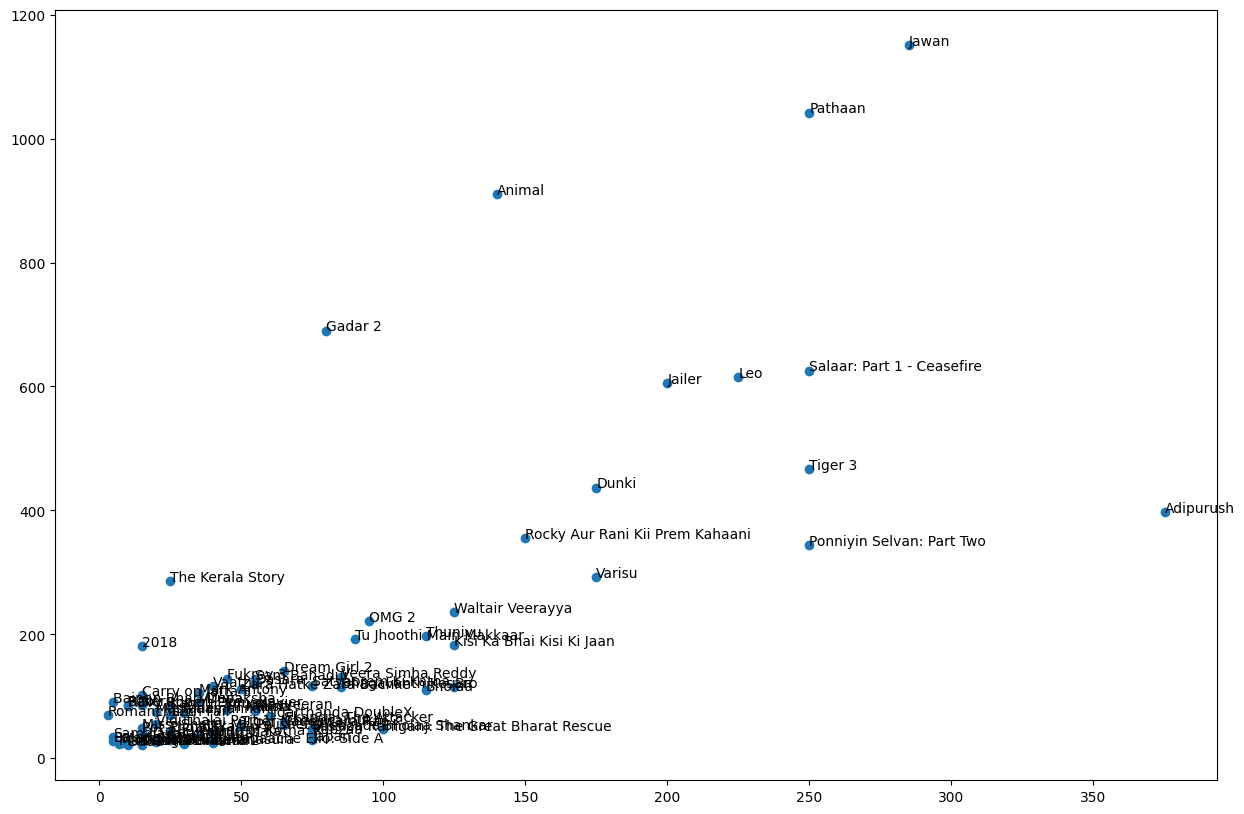

In [347]:
plt.figure(figsize=(15,10))
plt.scatter(df['Budget'],df['Worldwide Collection'])

for i in range(len(df)):
    plt.text(df['Budget'].iloc[i],df['Worldwide Collection'].iloc[i],df['name'].iloc[i])


In [348]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Budget'],y=df['Worldwide Collection'],mode='markers',hovertext=df['name']))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertext': array(['Jawan', 'Pathaan', 'Animal', 'Gadar 2', 'Salaar: Part 1 - Ceasefire',
                                  'Leo', 'Jailer', 'Tiger 3', 'Dunki', 'Adipurush',
                                  'Rocky Aur Rani Kii Prem Kahaani', 'Ponniyin Selvan: Part Two',
                                  'Varisu', 'Waltair Veerayya', 'The Kerala Story', 'OMG 2', 'Thunivu',
                                  'Tu Jhoothi Main Makkaar', 'Kisi Ka Bhai Kisi Ki Jaan', '2018',
                                  'Dream Girl 2', 'Veera Simha Reddy', 'Fukrey 3', 'Sam Bahadur',
                                  'Dasara', 'Satyaprem Ki Katha', 'Vaathi', 'Bro', 'Bhagavanth Kesari',
                                  'Zara Hatke Zara Bachke', 'Bholaa', 'Mark Antony', 'Carry on Jatta 3',
                                  'Baipan Bhari Deva', 'Virupaksha', 'Baby', 'Neru',
                                  'RDX: Robert Dony Xavier', 'Kannur Squad', 'Maaveeran', 'Hi Nanna',
                                  'Kushi', 'Mastaney', 'Maamannan', '12th Fail', 'Romancham',
                                  'Jigarthanda DoubleX', 'Skanda: The Attacker', 'Viduthalai Part 1',
                                  'Chandramukhi 2', 'Tiger Nageswara Rao', 'Miss. Shetty Mr. Polishetty',
                                  'Bholaa Shankar', 'Shehzada',
                                  'Mission Raniganj: The Great Bharat Rescue', 'Pichaikkaran 2',
                                  'Por Thozhil', 'Kabzaa', 'King of Kotha', 'Pathu Thala', 'DD Returns',
                                  'Samajavaragamana', 'Spy', 'Japan', 'Balagam', 'Ghost',
                                  'Sapta Sagaradaache Ello: Side A', 'Mad', 'Ravanasura',
                                  'Maa Oori Polimera 2', 'Devil', 'Das Ka Dhamki', 'Mangalavaaram',
                                  'Dada'], dtype=object),
              'mode': 'markers',
              'type': 'scatter',
              'x': array([285., 250., 140.,  80., 250., 225., 200., 250., 175., 375., 150., 250.,
                          175., 125.,  25.,  95., 115.,  90., 125.,  15.,  65.,  85.,  45.,  55.,
                           55.,  75.,  40., 125.,  85.,  50., 115.,  35.,  15.,   5.,  35.,  10.,
                           15.,  10.,  25.,  55.,  45.,  55.,  20.,  30.,  25.,   3.,  60.,  65.,
                           20.,  65.,  50.,  15., 100.,  75.,  75.,  25.,  15.,  75.,  40.,  35.,
                           15.,   5.,  25.,  75.,   5.,  20.,  20.,   8.,  40.,   7.,  30.,  15.,
                           15.,  10.]),
              'y': array([1150.7 , 1042.2 ,  910.4 ,  690.2 ,  625.6 ,  615.6 ,  605.8 ,  466.4 ,
                           436.8 ,  397.8 ,  355.6 ,  343.5 ,  292.8 ,  236.2 ,  285.6 ,  221.2 ,
                           196.8 ,  192.8 ,  182.5 ,  180.5 ,  140.2 ,  130.7 ,  128.4 ,  127.3 ,
                           120.4 ,  117.2 ,  116.5 ,  114.8 ,  114.5 ,  112.5 ,  110.5 ,  104.5 ,
                           101.5 ,   90.5 ,   90.25,   85.4 ,   85.2 ,   84.2 ,   82.3 ,   80.2 ,
                            77.2 ,   76.8 ,   74.2 ,   73.8 ,   69.7 ,   69.6 ,   68.5 ,   59.2 ,
                            55.6 ,   54.2 ,   52.6 ,   48.6 ,   47.6 ,   47.5 ,   45.7 ,   44.5 ,
                            43.5 ,   40.4 ,   39.4 ,   37.3 ,   35.2 ,   34.5 ,   29.6 ,   29.3 ,
                            27.3 ,   27.2 ,   26.4 ,   25.2 ,   24.9 ,   23.2 ,   23.2 ,   22.8 ,
                            21.8 ,   20.9 ])}],
    'layout': {'template': '...'}
})

In [349]:
df[['Budget']]

,Budget
0,285.0
1,250.0
2,140.0
3,80.0
4,250.0
...,...
80,7.0
81,30.0
82,15.0
83,15.0


In [350]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df[['Budget']]
y = df[['Worldwide Collection']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [351]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [352]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

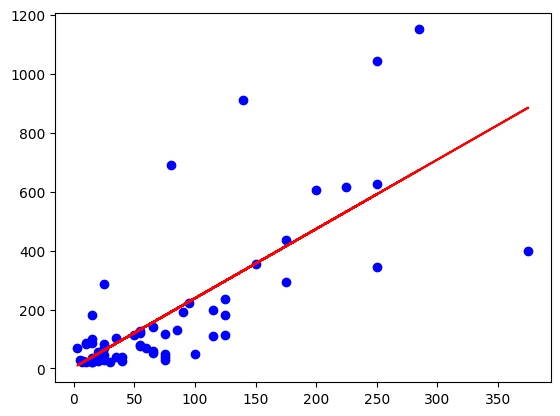

In [353]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,y_pred_train,color='red')

In [354]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred_train,y_train)
r2_score1

0.21411320325271277

In [355]:
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
mean_mse = np.mean(mse)
mean_mse

np.float64(-106.19218438676303)

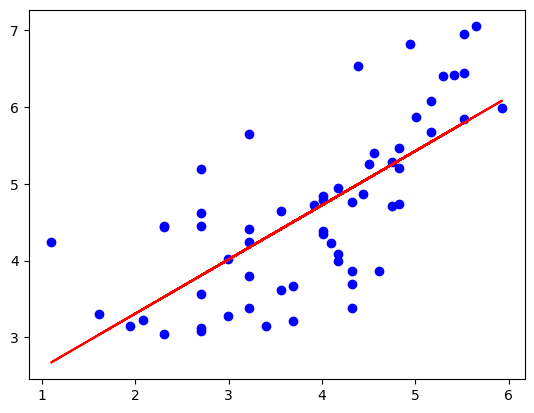

In [356]:
import numpy as np
df['Budget_log']=np.log(df['Budget'])
df['Collection_log']=np.log(df['Worldwide Collection'])
X_log = df[['Budget_log']]
y_log = df[['Collection_log']]
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state = 0)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,y_pred_train,color='red')

In [394]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(y_pred_train,y_train)
r2_score1

0.8220678569609478

In [393]:
r2_score1 = r2_score(y_pred_test,y_test)
r2_score1

0.7370801369903368

In [359]:
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_absolute_error',cv=10)
mean_mse = np.mean(mse)
mean_mse

np.float64(-0.6297513871311506)

In [360]:
df.head()

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India,India Net Collection,India Gross collection,India Net collection,Budget_log,Collection_log
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,...,All Time Blockbuster,6.9,99934,NaN,NaN,NaN,NaN,NaN,5.652489,7.048126
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,...,All Time Blockbuster,5.8,158261,NaN,NaN,NaN,NaN,NaN,5.521461,6.949089
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,...,Blockbuster,6.1,98028,NaN,NaN,NaN,NaN,NaN,4.941642,6.813884
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,...,Blockbuster,5.1,22652,NaN,NaN,NaN,NaN,NaN,4.382027,6.536981
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,...,Hit,6.6,69295,Salaar,NaN,NaN,NaN,NaN,5.521461,6.438711


In [361]:
df= df.iloc[:, :-5]
df.head()

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,Worldwide Collection,Overseas Collection,India Gross Collection,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,1150.7,386.4,764.3cr,All Time Blockbuster,6.9,99934,NaN,NaN
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,1042.2,393.4,648.8cr,All Time Blockbuster,5.8,158261,NaN,NaN
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,910.4,250.6,659.8cr,Blockbuster,6.1,98028,NaN,NaN
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,690.2,65.5,624.7cr,Blockbuster,5.1,22652,NaN,NaN
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,625.6,137.8,487.8cr,Hit,6.6,69295,Salaar,NaN


In [362]:
concat_genre = df['genre'].str.cat(sep=', ')
concat_genre

'Action, Crime, Drama, Action, Adventure, Thriller, Action, Crime, Drama, Action, Adventure, Drama, Action, Crime, Drama, Action, Crime, Drama, Action, Comedy, Crime, Action, Adventure, Thriller, Action, Adventure, Comedy, Action, Adventure, Drama, Comedy, Drama, Family, Action, Adventure, Drama, Action, Comedy, Drama, Action, Drama, Drama, Comedy, Drama, Action, Crime, Drama, Comedy, Romance, Action, Comedy, Drama, Action, Drama, Thriller, Comedy, Drama, Romance, Action, Drama, Comedy, Crime, Drama, Biography, Drama, War, Action, Adventure, Drama, Comedy, Drama, Musical, Action, Drama, Comedy, Drama, Family, Action, Drama, Thriller, Comedy, Drama, Family, Action, Adventure, Crime, Action, Comedy, Crime, Comedy, Drama, Romance, Comedy, Drama, Family, Action, Horror, Mystery, Drama, Romance, Drama, Thriller, Action, Adventure, Action, Crime, Drama, Action, Comedy, Drama, Drama, Family, Romance, Comedy, Drama, Romance, Action, Drama, History, Action, Drama, Thriller, Biography, Drama, Co

In [363]:
genre_set = (set(concat_genre.split(', ')))
genre_set

{'Action',
 'Adventure',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'History',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War'}

In [364]:
df

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,Worldwide Collection,Overseas Collection,India Gross Collection,Verdict,ratingValue,ratingCount,alternateName,First Day Collection India
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,1150.7,386.4,764.3cr,All Time Blockbuster,6.9,99934,NaN,NaN
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,1042.2,393.4,648.8cr,All Time Blockbuster,5.8,158261,NaN,NaN
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,910.4,250.6,659.8cr,Blockbuster,6.1,98028,NaN,NaN
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,690.2,65.5,624.7cr,Blockbuster,5.1,22652,NaN,NaN
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,625.6,137.8,487.8cr,Hit,6.6,69295,Salaar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,https://www.imdb.com/title/tt28512693/,Maa Oori Polimera 2,Revolves around a policeman who sets out to se...,https://m.media-amazon.com/images/M/MV5BZmIyMW...,NaN,Horror,PT2H5M,Telugu,7.0,3.2,23.2,2.5,20.7cr,Blockbuster,7.1,840,NaN,NaN
81,https://www.imdb.com/title/tt14989988/,Devil,It follows a British secret agent who takes up...,https://m.media-amazon.com/images/M/MV5BZjg5OD...,NaN,"Action, Drama, Thriller",PT2H24M,Telugu,30.0,4.8,23.2,1.8,21.4cr,Disaster,6.5,3331,NaN,NaN
82,https://www.imdb.com/title/tt23745844/,Das Ka Dhamki,A waiter is asked to impersonate his dead look...,https://m.media-amazon.com/images/M/MV5BMjIzNz...,Not Rated,"Action, Comedy, Drama",PT2H20M,Telugu,15.0,8.5,22.8,2.7,20.1cr,Hit,6.1,2014,NaN,NaN
83,https://www.imdb.com/title/tt26763310/,Mangalavaaram,Fear engulfs a village as murders pile up myst...,https://m.media-amazon.com/images/M/MV5BZjk4OG...,NaN,"Action, Horror, Thriller",PT2H29M,Telugu,15.0,4.2,21.8,2.3,19.5cr,Hit,6.7,2871,NaN,NaN


In [365]:
for colName in genre_set:
    df[colName]=0
df

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Sci-Fi,Thriller,Drama,Family,History,Romance,Biography,Musical,Adventure,Comedy
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,...,0,0,0,0,0,0,0,0,0,0
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,...,0,0,0,0,0,0,0,0,0,0
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,...,0,0,0,0,0,0,0,0,0,0
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,...,0,0,0,0,0,0,0,0,0,0
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,https://www.imdb.com/title/tt28512693/,Maa Oori Polimera 2,Revolves around a policeman who sets out to se...,https://m.media-amazon.com/images/M/MV5BZmIyMW...,NaN,Horror,PT2H5M,Telugu,7.0,3.2,...,0,0,0,0,0,0,0,0,0,0
81,https://www.imdb.com/title/tt14989988/,Devil,It follows a British secret agent who takes up...,https://m.media-amazon.com/images/M/MV5BZjg5OD...,NaN,"Action, Drama, Thriller",PT2H24M,Telugu,30.0,4.8,...,0,0,0,0,0,0,0,0,0,0
82,https://www.imdb.com/title/tt23745844/,Das Ka Dhamki,A waiter is asked to impersonate his dead look...,https://m.media-amazon.com/images/M/MV5BMjIzNz...,Not Rated,"Action, Comedy, Drama",PT2H20M,Telugu,15.0,8.5,...,0,0,0,0,0,0,0,0,0,0
83,https://www.imdb.com/title/tt26763310/,Mangalavaaram,Fear engulfs a village as murders pile up myst...,https://m.media-amazon.com/images/M/MV5BZjk4OG...,NaN,"Action, Horror, Thriller",PT2H29M,Telugu,15.0,4.2,...,0,0,0,0,0,0,0,0,0,0


In [366]:
df.columns

Index(['url', 'name', 'description', 'image', 'contentRating', 'genre',
       'duration', 'Language', 'Budget', 'First Day Collection Worldwide',
       'Worldwide Collection', 'Overseas Collection', 'India Gross Collection',
       'Verdict', 'ratingValue', 'ratingCount', 'alternateName',
       'First Day Collection India', 'War', 'Mystery', 'Action', 'Crime',
       'Horror', 'Sci-Fi', 'Thriller', 'Drama', 'Family', 'History', 'Romance',
       'Biography', 'Musical', 'Adventure', 'Comedy'],
      dtype='object')

In [367]:
df.head()

,url,name,description,image,contentRating,genre,duration,Language,Budget,First Day Collection Worldwide,...,Sci-Fi,Thriller,Drama,Family,History,Romance,Biography,Musical,Adventure,Comedy
0,https://www.imdb.com/title/tt15354916/,Jawan,A prison warden recruits inmates to commit out...,https://m.media-amazon.com/images/M/MV5BOWI5Nm...,Not Rated,"Action, Crime, Drama",PT2H49M,Hindi,285.0,129.6,...,0,0,0,0,0,0,0,0,0,0
1,https://www.imdb.com/title/tt12844910/,Pathaan,An Indian agent races against a doomsday clock...,https://m.media-amazon.com/images/M/MV5BYTgzNj...,Not Rated,"Action, Adventure, Thriller",PT2H26M,Hindi,250.0,104.8,...,0,0,0,0,0,0,0,0,0,0
2,https://www.imdb.com/title/tt13751694/,Animal,The hardened son of a powerful industrialist r...,https://m.media-amazon.com/images/M/MV5BNGViM2...,Not Rated,"Action, Crime, Drama",PT3H24M,Hindi,140.0,115.9,...,0,0,0,0,0,0,0,0,0,0
3,https://www.imdb.com/title/tt15441054/,Gadar 2,When Tara Singh goes missing during a skirmish...,https://m.media-amazon.com/images/M/MV5BODJkYj...,Not Rated,"Action, Adventure, Drama",PT2H50M,Hindi,80.0,53.7,...,0,0,0,0,0,0,0,0,0,0
4,https://www.imdb.com/title/tt13927994/,Salaar: Part 1 - Ceasefire,The fate of a violently contested kingdom hang...,https://m.media-amazon.com/images/M/MV5BYWM5OG...,Not Rated,"Action, Crime, Drama",PT2H55M,Telugu,250.0,165.3,...,0,0,0,0,0,0,0,0,0,0


In [368]:
categories = df['Verdict'].astype('category').cat.categories

code_to_category = pd.DataFrame({'Code': range(len(categories)),'Verdict': categories})
df['Verdict'] = df['Verdict'].astype('category').cat.codes
code_to_category

,Code,Verdict
0,0,All Time Blockbuster
1,1,Average
2,2,Blockbuster
3,3,Disaster
4,4,Flop
5,5,Hit
6,6,Super Hit


In [369]:
categories = df['Language'].astype('category').cat.categories

code_to_category = pd.DataFrame({'Code': range(len(categories)),'Language': categories})
df['Language'] = df['Language'].astype('category').cat.codes
code_to_category

,Code,Language
0,0,Hindi
1,1,Kannada
2,2,Malayalam
3,3,Marathi
4,4,Punjabi
5,5,Tamil
6,6,Telugu


In [370]:
row=-1
for genre_type in df['genre']:
    row+=1
    genre_sep = genre_type.split(', ')
    for val in genre_sep:
        df.loc[row,val]=1

In [371]:
df.columns

Index(['url', 'name', 'description', 'image', 'contentRating', 'genre',
       'duration', 'Language', 'Budget', 'First Day Collection Worldwide',
       'Worldwide Collection', 'Overseas Collection', 'India Gross Collection',
       'Verdict', 'ratingValue', 'ratingCount', 'alternateName',
       'First Day Collection India', 'War', 'Mystery', 'Action', 'Crime',
       'Horror', 'Sci-Fi', 'Thriller', 'Drama', 'Family', 'History', 'Romance',
       'Biography', 'Musical', 'Adventure', 'Comedy'],
      dtype='object')

In [372]:
df[['Verdict']]

,Verdict
0,0.0
1,0.0
2,2.0
3,2.0
4,5.0
...,...
55,NaN
56,NaN
58,NaN
69,NaN


In [373]:
df = df.iloc[:-11,:]

In [374]:
new_df = df.iloc[:,-15:]

In [375]:
new_df = pd.concat([new_df,df[['Verdict']]],axis = 1)

In [376]:
new_df

,War,Mystery,Action,Crime,Horror,Sci-Fi,Thriller,Drama,Family,History,Romance,Biography,Musical,Adventure,Comedy,Verdict
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [377]:
new_df = pd.concat([new_df,df.iloc[:,7:11]],axis=1)

In [378]:
new_df.to_csv('TestDataNew.csv',index=True)

In [379]:
new_df

,War,Mystery,Action,Crime,Horror,Sci-Fi,Thriller,Drama,Family,History,Romance,Biography,Musical,Adventure,Comedy,Verdict,Language,Budget,First Day Collection Worldwide,Worldwide Collection
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285.0,129.6,1150.7
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250.0,104.8,1042.2
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,140.0,115.9,910.4
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,80.0,53.7,690.2
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,250.0,165.3,625.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,7.0,3.2,23.2
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,30.0,4.8,23.2
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,15.0,8.5,22.8
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,15.0,4.2,21.8


In [380]:
X = new_df.iloc[:,:-1]
y = df[['Worldwide Collection']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [381]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [382]:
r2_score1 = r2_score(y_pred_train,y_train)
r2_score1

0.8220678569609478

In [383]:
r2_score1 = r2_score(y_pred_test,y_test)
r2_score1

0.7370801369903368

In [384]:
new_df.columns

Index(['War', 'Mystery', 'Action', 'Crime', 'Horror', 'Sci-Fi', 'Thriller',
       'Drama', 'Family', 'History', 'Romance', 'Biography', 'Musical',
       'Adventure', 'Comedy', 'Verdict', 'Language', 'Budget',
       'First Day Collection Worldwide', 'Worldwide Collection'],
      dtype='object')

In [385]:
new_df.to_csv('2023_df.csv',index=True)

In [386]:
testFilePath = r'/Users/vineetjujjavarapu/Downloads/MoviePredTestData - Sheet2 (2).csv'

In [387]:
testdf = pd.read_csv(testFilePath)

In [388]:
testdf

,Unnamed: 0,Crime,Mystery,Thriller,Musical,History,Sci-Fi,Biography,Romance,Adventure,...,Action,War,Horror,Comedy,Family,Verdict,Language,Budget,First Day Collection Worldwide,Worldwide Collection
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,285,150.0,1150.7
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,6,125,73.2,184.0
2,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,2,6,35,23.4,296.0
3,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,2,6,450,182.6,1060.4
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,240,37.8,337.4


In [389]:
test1_devara = testdf.iloc[:,:-1]
test1_devara = test1_devara.drop(columns=['Unnamed: 0'])

In [390]:
test1_devara

,Crime,Mystery,Thriller,Musical,History,Sci-Fi,Biography,Romance,Adventure,Drama,Action,War,Horror,Comedy,Family,Verdict,Language,Budget,First Day Collection Worldwide
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,285,150.0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,6,125,73.2
2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,2,6,35,23.4
3,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,2,6,450,182.6
4,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,240,37.8


In [391]:
test1_devara_pred = lr.predict(test1_devara)
test1_devara_pred

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
